<p style="font-family: Arial; font-size:3.5em;color:purple; font-style:bold"><br>
泰坦尼克号：谁活下来了</p><br>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Kaggle</p><br>
[Kaggle](https://www.kaggle.com)是一个数据科学和机器学习竞赛网站。<br>
有数据，有问题，可以辅助学习。
<img src="img/kaggle.png">

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Titanic</p><br>
1912年，泰坦尼克号，当时世界上最大最豪华的邮轮。<br>
在首次航行中，这艘号称“永不沉没”的轮船，途中与一座冰山相撞，沉入大西洋底。<br>
泰坦尼克号共搭载2224名乘客，这次事故导致1502人遇难。
<img src="img/titanic.jpg">

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Titanic竞赛</p><br>
Kaggle上的Titanic竞赛是一个学习目的的竞赛。<br>
- 省略了数据收集过程
- 训练用数据集
- 预测用数据集
- 分析哪种乘客更可能生存下来
- 预测某个乘客是否能够生存

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
今天的讲座</p><br>
完整的走一遍Titanic竞赛的基础解决方案，对数据分析和机器学习有一个基本的了解。<br>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
数据</p><br>
- 两个数据集：训练集和预测集
- 每一条数据代表一个乘客
- 每一条数据有很多属性（特征、列）
- 训练集有一个目标属性，代表该乘客是否存活，预测集没有该属性，它是我们预测的目标
<img src="img/dataset.png">

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Python</p><br>
- 大数据方向，如果只能学一门语言，不要犹豫，学习Python
- 如果还要学一门语言，学习Java

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Jupyter Notebook</p>
<br>
- 开源web应用
- 创建和共享代码笔记
- 可以包含实时代码、等式、可视化图表以及叙述性文字
- 我们现在看到的就是一个Jupyter笔记文档

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
加载数据集</p>
<br>
使用开源Python数据分析库pandas

In [ ]:
# 导入pandas库
import pandas as pd

# 从文件中读入训练集
# csv: 逗号分隔的值
train = pd.read_csv("train.csv")

# 从文件中读入预测数据集
predict_set = pd.read_csv("test.csv")

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
查看数据</p>

In [ ]:
# 训练集前三条
train.head(3)

In [ ]:
# 预测集后三条
# 注意少了Survived列
predict_set.tail(3)

In [ ]:
# 训练集的“形状”，多少行多少列
train_shape = train.shape
train_shape

In [ ]:
# 预测数据集的行列数目
predict_set_shape = predict_set.shape
predict_set_shape

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
数据字典</p>
<br>
解释数据集的每一列的含义。
- PassengerId：每个乘客的唯一标识
- Survived：乘客是否存活（0=否，1=是）
- Pclass：船票等级（1=一等舱，2=二等舱，3=三等舱）
- Name：姓名
- Sex：性别
- Age：年龄
- SibSp：乘客同船的兄弟姐妹或配偶的数量
- Parch：乘客同船的父母或孩子的数量
- Ticket：船票号码
- Fare：乘客支付的票价
- Cabin：乘客的船舱号
- Embarked：乘客登船的港口（C=Cherbourg, Q=Queenstown, S=Southampton）

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
理解问题和数据是至关重要的一步</p>
<br>
我们要做的事情，用机器学习的术语来说，称为**分类**，**classification**。<br>
更具体的说，**二元分类**，**binary classification**。<br>
因为我们要把一名乘客归为某一类：存活或者遇难。

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
理解数据</p>
<br>
<img src="img/titanic_poster.jpg">
<br>
看过《泰坦尼克号》电影的人应该记得，电影中女人和小孩优先上救生艇。<br>
一等舱和三等舱的反差也让人深思。<br>
自然可以想到，性别、年龄、船票等级这三个特征，对最终的分类结果（是否生存）应该会有较大的影响。<br>
因此，我们选择这三个特征用于学习和预测结果。<br>
实际工程中，**特征选择**属于**特征工程**要解决的重要问题，对结果的好坏有着重要影响。

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
类别（categorical）特征</p>
<br>
性别的值只有两个，男或女；船票等级的值有三个，一等舱、二等舱、三等舱。这样的特征称为类别（categorical）特征。<br>
下面使用pandas的透视表功能，按性别分组，计算每种性别的存活平均值。

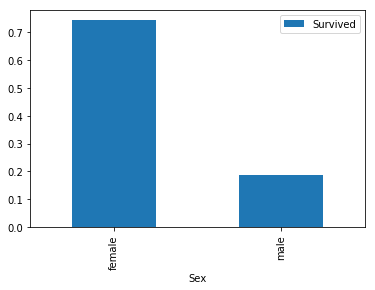

In [7]:
# 导入python的常用图表库matplotlib
import matplotlib.pyplot as plt

# 按Sex分组，计算每组的Survived的平均值
sex_pivot = train.pivot_table(index="Sex",
                              values="Survived")
sex_pivot.plot.bar()
plt.show()

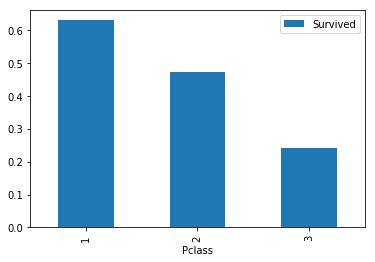

In [8]:
# 按船票等级分组计算
pclass_pivot = train.pivot_table(index="Pclass",
                                 values="Survived")
pclass_pivot.plot.bar()
plt.show()

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
连续（continuous）特征</p>
<br>
和性别不同，年龄这个特征属于连续特征，取值是连续的数值。<br>
下面对年龄做一些处理，包括缺失值填充，将年龄分类。<br>
如图所示：
<img src="img/process_age.png">

In [9]:
# 定义一个处理年龄的函数
# 训练集、测试集都可以使用
def process_age(df, cut_points, label_names):
    # 年龄缺失值使用-0.5填充
    df["Age"] = df["Age"].fillna(-0.5)
    # 为数据集增加一个 年龄分类 属性
    df["Age_categories"] = pd.cut(df["Age"],
                                  cut_points,
                                  labels=label_names)
    return df

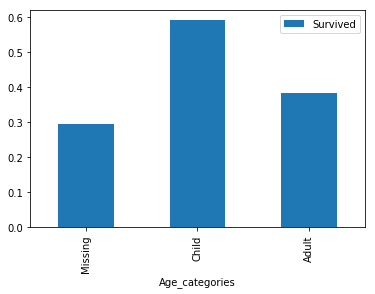

In [10]:
# 年龄分类的边界点
cut_points = [-1, 0, 15, 100]
# 年龄分类的标签
label_names = ['Missing', 
               'Child', 'Adult']

# 对数据集的年龄进行处理
train = process_age(train, cut_points, label_names)
predict_set = process_age(predict_set, cut_points, label_names)

# 按年龄分类计算存活率，并以图表展示
age_cat_pivot = train.pivot_table(index="Age_categories",
                                  values="Survived")
age_cat_pivot.plot.bar()
plt.show()

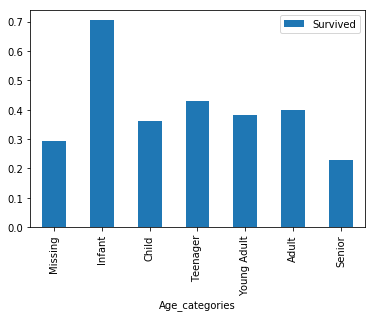

In [11]:
# 年龄分类的边界点
cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
# 年龄分类的标签
label_names = ['Missing', 'Infant',
               'Child', 'Teenager',
               'Young Adult', 'Adult',
               'Senior']

# 对数据集的年龄进行处理
train = process_age(train, cut_points, label_names)
predict_set = process_age(predict_set, cut_points, label_names)

# 按年龄分类计算存活率，并以图表展示
age_cat_pivot = train.pivot_table(index="Age_categories",
                                  values="Survived")
age_cat_pivot.plot.bar()
plt.show()

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
为机器学习做准备 - 船票等级</p>
<br>
船票等级（Pclass）取值为1、2、3，这并不意味着二等舱的价值是一等舱的2倍。<br>
为了避免误导，对Pclass做处理，生成三个新的特征。
<img src="img/pclass.png">

In [12]:
# 创建新列，并加入到原来的数据集中
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name],
                             prefix=column_name)
    df = pd.concat([df, dummies], axis=1)
    return df


# 为Pclass创建新的列
train = create_dummies(train, "Pclass")
predict_set = create_dummies(predict_set, "Pclass")

In [13]:
# 类似地，为性别和年龄类别创建新列
train = create_dummies(train, "Sex")
predict_set = create_dummies(predict_set, "Sex")
train = create_dummies(train, "Age_categories")
predict_set = create_dummies(predict_set, "Age_categories")

In [15]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
逻辑回归（Logistic Regression）</p>
<br>
现在进入训练模型的阶段。<br>
使用Python的[scikit-learn](http://scikit-learn.org)库，主要工作流程如下：<br>
- 创建指定的机器学习模型对象
- 使用训练数据训练模型
- 使用生成的模型做预测
- 评估预测的准确性
我们选用LogisticRegression，即逻辑回归来做尝试。

In [16]:
# 从sklearn库中导入逻辑回归模型
from sklearn.linear_model import LogisticRegression

# 选择这些特征，用于训练模型
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3',
           'Sex_female', 'Sex_male',
           'Age_categories_Missing','Age_categories_Infant',
           'Age_categories_Child', 'Age_categories_Teenager',
           'Age_categories_Young Adult',
           'Age_categories_Adult',
           'Age_categories_Senior']

# 创建模型对象
lr = LogisticRegression()

# 使用所选特征，针对目标Survived进行训练
lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
划分训练数据集</p>
<br>
将训练集随机划分为两部分：
- 一部分用于训练模型（通常使用训练集的80%或2/3）
- 一部分用于测试模型（使用剩余的20%或1/3）
<br><br>
这里，使用sklearn的train_test_split()函数随机划分<br>
输入(X, y) -> 输出(train_X, test_X, train_y, test_y)
<img src="img/split.png">

In [17]:
from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3',
           'Sex_female', 'Sex_male',
           'Age_categories_Missing',
           'Age_categories_Infant',
           'Age_categories_Child',
           'Age_categories_Teenager',
           'Age_categories_Young Adult',
           'Age_categories_Adult',
           'Age_categories_Senior']

# 输入
all_X = train[columns]
all_y = train['Survived']

# 划分训练集
train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2, random_state=0)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
使用模型做预测</p>
<br>
基于前面划分的训练集的训练部分，使用逻辑回归方法训练得到了对应的模型。<br>
然后，我们就可以使用这个模型，在测试部分的数据集中做预测了。

In [18]:
# 创建逻辑回归模型
lr = LogisticRegression()
# 使用训练集的训练部分，训练模型
lr.fit(train_X, train_y)
# 使用模型，在测试部分做预测
predictions = lr.predict(test_X)
predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
模型的准确性</p>
<br>
如何衡量这个模型的准确性？<br>
常用的方法是，计算正确结果的百分比，即正确率。<br>
sklearn的accuracy_score()函数可以帮助我们计算。

In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.810055865922


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
交叉验证（Cross Validation）</p>
<br>
前面计算模型准确性的方法，带有相当的随机性。<br>
如果再划分一次进行计算，得到的结果可能和前一次相差很多。<br>
为了得到较为稳定的准确性数值，需要使用交叉验证（Cross Validation）方法。<br>
总的思想是，在训练集上作多次划分，得到多个结果，然后求平均值。<br>
这里我们采用交叉验证中常见的一种，称为**k-fold**。<br>
<img src="img/k_fold.png">
如上图所示，将训练集分成k块。<br>
迭代k次，每次用其中一块作为测试集，其余k-1块作为训练集。<br>
得到k个准确性数值，最后求平均值。

In [20]:
from sklearn.model_selection import cross_val_score
import numpy as np

# 新建一个逻辑回归模型对象
lr = LogisticRegression()
# 进行k-fold交叉验证，k=10，得到10个准确性分数
scores = cross_val_score(lr,
                         all_X,
                         all_y,
                         cv=10)
# 求平均值，作为最终准确性分数
accuracy = np.mean(scores)
print(scores)
print(accuracy)

[ 0.8         0.81111111  0.7752809   0.87640449  0.80898876  0.78651685
  0.76404494  0.76404494  0.83146067  0.80681818]
0.802467086596


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
在整个训练集上训练模型并预测</p>
<br>
交叉验证告诉我们，逻辑回归模型的准确性约为80%。<br>
什么程度的准确性可以接受，取决于具体的问题和应用场景。现在姑且认为是可以接受的。<br>
那么下一步，将在整个训练集上训练模型，并且在未知结果的预测集上做预测。

In [21]:
# 特征列
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3',
           'Sex_female', 'Sex_male',
           'Age_categories_Missing',
           'Age_categories_Infant',
           'Age_categories_Child',
           'Age_categories_Teenager',
           'Age_categories_Young Adult',
           'Age_categories_Adult',
           'Age_categories_Senior']

# 新建逻辑回归模型对象
lr = LogisticRegression()
# 使用整个训练集训练模型
lr.fit(all_X, all_y)
# 对预测数据集做预测
predict_set_predictions = lr.predict(predict_set[columns])
predict_set_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
成绩</p>
<br>
预测的结果如何？<br>
得分为0.75598，或者说，正确率为75.6%。<br>
这是一个起点，我们使用并不复杂的手段，得到了一个还过得去的分数。<br>
后续还有优化的空间和手段。

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
机器学习并非魔法</p>
<br>
如果有人得到了一个准确率为100%的模型，可以预测船上每一个人的生死。<br>
这个人一定是个骗子。<br>
现实中，影响一件事结果的因素可能是无比复杂的，机器学习通常得到一个大概率的结果。<br>
在合适的场景下，这个结果可以给我们非常大的帮助。

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
下一步</p>
<br>
我们有很多方法手段，可以提升结果的准确性。<br>
例如：
- 改进特征
  - 选择更多相关的特征
  - 在现有数据上创建新的特征
- 改进模型
  - 尝试更多的机器学习模型
  - 进行模型的参数优化